In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor as DTR
import sklearn.metrics as metrics
from graphviz import Source
import pydot
from sklearn import tree
from PIL import Image
from IPython.display import SVG
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('train_1.csv', delimiter=',')

# Problem 6

## 1

### A

Lasso regression is a regularization technique. The goal of lasso regression is behind additional regularization of parameters. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. As far as I understand from lections lasso regression is helpful when we need to deal with large datasets, where we have a lot of explanatory variables and only a subset of them are relevant to our model, because we penalize coefficients of the model, so we can easily eliminate the leas important variables. 

To fit linear regression, we need number of observations not less, than number of features. If it is more than, then we will have space of solutions with > 2 dimensions. But with lasso regression, we can estimate it even with low amount of observations. To summarise this thesis - if number of independent variables is larger than number of observations we can use lasso regression, but not linear regression.

Also it is better to apply Lasso when we don't know our data and it includes a set of unimportant variables in it.

Ridge regression
minimization of coefficient reduce the dependency of prediction on a particular variable.

Ridge Regression was conceptualized as being applied to the negative of the objective function (that is, as a maximization problem)

### B

This is due to a reason Lasso's penalty function includes the sum of the absolute value of the feature coefficients, which is not implemented in in linear regression. That's why scaling of features is essential in Lasso.

About FireplaceQu it is string variable and we need to convert it to categorical.

In [ ]:
# Let's encode every categorical feature

data2 = pd.read_csv('train_1.csv', delimiter=',')
data2 = pd.DataFrame(data2).fillna(data2.mean())
#data2 = pd.DataFrame(data2).fillna()
mszoning_to_code = {marital:i for i, marital in enumerate(data2['MSZoning'].unique())}
street_to_code = {gender:i for i, gender in enumerate(data2['Street'].unique())}
lot_to_code = {retire:i for i, retire in enumerate(data2['LotShape'].unique())}
land_to_code = {marital:i for i, marital in enumerate(data2['LandContour'].unique())}
utilities_to_code = {gender:i for i, gender in enumerate(data2['Utilities'].unique())}
lotconfig_to_code = {retire:i for i, retire in enumerate(data2['LotConfig'].unique())}
neighborhood_to_code = {marital:i for i, marital in enumerate(data2['Neighborhood'].unique())}
landslope_to_code = {gender:i for i, gender in enumerate(data2['LandSlope'].unique())}
condition1_to_code = {retire:i for i, retire in enumerate(data2['Condition1'].unique())}
condition2_to_code = {marital:i for i, marital in enumerate(data2['Condition2'].unique())}
bigtype_to_code = {gender:i for i, gender in enumerate(data2['BldgType'].unique())}
housestyle_to_code = {retire:i for i, retire in enumerate(data2['HouseStyle'].unique())}
roofstyle_to_code = {marital:i for i, marital in enumerate(data2['RoofStyle'].unique())}
roofmatl_to_code = {gender:i for i, gender in enumerate(data2['RoofMatl'].unique())}
exterior1st_to_code = {retire:i for i, retire in enumerate(data2['Exterior1st'].unique())}
exterior2nd_to_code = {marital:i for i, marital in enumerate(data2['Exterior2nd'].unique())}
exterQual_to_code = {gender:i for i, gender in enumerate(data2['ExterQual'].unique())}
exterCond_to_code = {retire:i for i, retire in enumerate(data2['ExterCond'].unique())}
foundation_to_code = {marital:i for i, marital in enumerate(data2['Foundation'].unique())}
heating_to_code = {gender:i for i, gender in enumerate(data2['Heating'].unique())}
heatingqc_to_code = {retire:i for i, retire in enumerate(data2['HeatingQC'].unique())}
centralair_to_code = {marital:i for i, marital in enumerate(data2['CentralAir'].unique())}
kitchenqual_to_code = {gender:i for i, gender in enumerate(data2['KitchenQual'].unique())}
functional_to_code = {retire:i for i, retire in enumerate(data2['Functional'].unique())}
paveddrive_to_code = {gender:i for i, gender in enumerate(data2['PavedDrive'].unique())}
saletype_to_code = {retire:i for i, retire in enumerate(data2['SaleType'].unique())}
salecondition_to_code = {gender:i for i, gender in enumerate(data2['SaleCondition'].unique())}
masvnrtype_to_code = {gender:i for i, gender in enumerate(data2['MasVnrType'].unique())}
bsmtqual_to_code = {gender:i for i, gender in enumerate(data2['BsmtQual'].unique())}
bsmtexposure_to_code = {gender:i for i, gender in enumerate(data2['BsmtExposure'].unique())}
bsmtfinsf1_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinSF1'].unique())}
bsmtfintype1_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinType1'].unique())}
bsmtfinsf1_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinSF2'].unique())}
bsmtfintype2_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinType2'].unique())}
garagetype_to_code = {gender:i for i, gender in enumerate(data2['GarageType'].unique())}
electrical_to_code = {gender:i for i, gender in enumerate(data2['Electrical'].unique())}
garagequal_to_code = {gender:i for i, gender in enumerate(data2['GarageQual'].unique())}
garagefinish_to_code = {gender:i for i, gender in enumerate(data2['GarageFinish'].unique())}
fence_to_code = {gender:i for i, gender in enumerate(data2['Fence'].unique())}
miscfeature_to_code = {gender:i for i, gender in enumerate(data2['MiscFeature'].unique())}
openporchsf_to_code = {gender:i for i, gender in enumerate(data2['OpenPorchSF'].unique())}
garagecond_to_code = {gender:i for i, gender in enumerate(data2['GarageCond'].unique())}
wooddecksf_to_code = {gender:i for i, gender in enumerate(data2['WoodDeckSF'].unique())}
bsmtcond_to_code = {gender:i for i, gender in enumerate(data2['BsmtCond'].unique())}
fireplacequ_to_code = {gender:i for i, gender in enumerate(data2['FireplaceQu'].unique())}
alley_to_code = {gender:i for i, gender in enumerate(data2['Alley'].unique())}
poolqc_to_code = {gender:i for i, gender in enumerate(data2['PoolQC'].unique())}

mszoning_to_code = {mszoning:i for i, mszoning in enumerate(data2['MSZoning'].unique())}
data2['MSZoning_code'] = data2['MSZoning'].map(lambda x: mszoning_to_code[x])
data2.drop('MSZoning', axis=1, inplace=True)

data2['Street_code'] = data2['Street'].map(lambda x: street_to_code[x])
data2.drop('Street', axis=1, inplace=True)

data2['LotShape_code'] = data2['LotShape'].map(lambda x: lot_to_code[x])
data2.drop('LotShape', axis=1, inplace=True)

data2['LandContour_code'] = data2['LandContour'].map(lambda x: land_to_code[x])
data2.drop('LandContour', axis=1, inplace=True)

data2['Utilities_code'] = data2['Utilities'].map(lambda x: utilities_to_code[x])
data2.drop('Utilities', axis=1, inplace=True)

data2['LotConfig_code'] = data2['LotConfig'].map(lambda x: lotconfig_to_code[x])
data2.drop('LotConfig', axis=1, inplace=True)

data2['Neighborhood_code'] = data2['Neighborhood'].map(lambda x: neighborhood_to_code[x])
data2.drop('Neighborhood', axis=1, inplace=True)

data2['LandSlope_code'] = data2['LandSlope'].map(lambda x: landslope_to_code[x])
data2.drop('LandSlope', axis=1, inplace=True)

data2['Condition1_code'] = data2['Condition1'].map(lambda x: condition1_to_code[x])
data2.drop('Condition1', axis=1, inplace=True)

data2['Condition2_code'] = data2['Condition2'].map(lambda x: condition2_to_code[x])
data2.drop('Condition2', axis=1, inplace=True)

data2['BldgType_code'] = data2['BldgType'].map(lambda x: bigtype_to_code[x])
data2.drop('BldgType', axis=1, inplace=True)

data2['HouseStyle_code'] = data2['HouseStyle'].map(lambda x: housestyle_to_code[x])
data2.drop('HouseStyle', axis=1, inplace=True)

data2['RoofStyle_code'] = data2['RoofStyle'].map(lambda x: roofstyle_to_code[x])
data2.drop('RoofStyle', axis=1, inplace=True)

data2['RoofMatl_code'] = data2['RoofMatl'].map(lambda x: roofmatl_to_code[x])
data2.drop('RoofMatl', axis=1, inplace=True)

data2['Exterior1st_code'] = data2['Exterior1st'].map(lambda x: exterior1st_to_code[x])
data2.drop('Exterior1st', axis=1, inplace=True)

data2['Exterior2nd_code'] = data2['Exterior2nd'].map(lambda x: exterior2nd_to_code[x])
data2.drop('Exterior2nd', axis=1, inplace=True)

data2['ExterQual_code'] = data2['ExterQual'].map(lambda x: exterQual_to_code[x])
data2.drop('ExterQual', axis=1, inplace=True)

data2['ExterCond_code'] = data2['ExterCond'].map(lambda x: exterCond_to_code[x])
data2.drop('ExterCond', axis=1, inplace=True)

data2['Foundation_code'] = data2['Foundation'].map(lambda x: foundation_to_code[x])
data2.drop('Foundation', axis=1, inplace=True)

data2['Heating_code'] = data2['Heating'].map(lambda x: heating_to_code[x])
data2.drop('Heating', axis=1, inplace=True)

data2['HeatingQC_code'] = data2['HeatingQC'].map(lambda x: heatingqc_to_code[x])
data2.drop('HeatingQC', axis=1, inplace=True)

data2['CentralAir_code'] = data2['CentralAir'].map(lambda x: centralair_to_code[x])
data2.drop('CentralAir', axis=1, inplace=True)

data2['KitchenQual_code'] = data2['KitchenQual'].map(lambda x: kitchenqual_to_code[x])
data2.drop('KitchenQual', axis=1, inplace=True)

data2['Functional_code'] = data2['Functional'].map(lambda x: functional_to_code[x])
data2.drop('Functional', axis=1, inplace=True)

data2['PavedDrive_code'] = data2['PavedDrive'].map(lambda x: paveddrive_to_code[x])
data2.drop('PavedDrive', axis=1, inplace=True)

data2['SaleType_code'] = data2['SaleType'].map(lambda x: saletype_to_code[x])
data2.drop('SaleType', axis=1, inplace=True)

data2['SaleCondition_code'] = data2['SaleCondition'].map(lambda x: salecondition_to_code[x])
data2.drop('SaleCondition', axis=1, inplace=True)

data2['MasVnrType_code'] = data2['MasVnrType'].map(lambda x: masvnrtype_to_code[x])
data2.drop('MasVnrType', axis=1, inplace=True)



data2['BsmtQual_code'] = data2['BsmtQual'].map(lambda x: bsmtqual_to_code[x])
data2.drop('BsmtQual', axis=1, inplace=True)

data2['BsmtExposure_code'] = data2['BsmtExposure'].map(lambda x: bsmtexposure_to_code[x])
data2.drop('BsmtExposure', axis=1, inplace=True)

data2['BsmtFinType1_code'] = data2['BsmtFinType1'].map(lambda x: bsmtfintype1_to_code[x])
data2.drop('BsmtFinType1', axis=1, inplace=True)

#data2['BsmtFinSF1_code'] = data2['BsmtFinSF1'].map(lambda x: bsmtfinsf1_to_code[x])
#data2.drop('BsmtFinSF1', axis=1, inplace=True)

#data2['BsmtFinSF2_code'] = data2['BsmtFinSF2'].map(lambda x: bsmtfinsf2_to_code[x])
#data2.drop('BsmtFinSF2', axis=1, inplace=True)

data2['BsmtFinType2_code'] = data2['BsmtFinType2'].map(lambda x: bsmtfintype2_to_code[x])
data2.drop('BsmtFinType2', axis=1, inplace=True)

data2['Electrical_code'] = data2['Electrical'].map(lambda x: electrical_to_code[x])
data2.drop('Electrical', axis=1, inplace=True)

data2['GarageType_code'] = data2['GarageType'].map(lambda x: garagetype_to_code[x])
data2.drop('GarageType', axis=1, inplace=True)

data2['GarageFinish_code'] = data2['GarageFinish'].map(lambda x: garagefinish_to_code[x])
data2.drop('GarageFinish', axis=1, inplace=True)

data2['GarageQual_code'] = data2['GarageQual'].map(lambda x: garagequal_to_code[x])
data2.drop('GarageQual', axis=1, inplace=True)

data2['GarageCond_code'] = data2['GarageCond'].map(lambda x: garagecond_to_code[x])
data2.drop('GarageCond', axis=1, inplace=True)

data2['WoodDeckSF_code'] = data2['WoodDeckSF'].map(lambda x: wooddecksf_to_code[x])
data2.drop('WoodDeckSF', axis=1, inplace=True)

data2['OpenPorchSF_code'] = data2['OpenPorchSF'].map(lambda x: openporchsf_to_code[x])
data2.drop('OpenPorchSF', axis=1, inplace=True)

data2['Fence_code'] = data2['Fence'].map(lambda x: fence_to_code[x])
data2.drop('Fence', axis=1, inplace=True)

data2['MiscFeature_code'] = data2['MiscFeature'].map(lambda x: miscfeature_to_code[x])
data2.drop('MiscFeature', axis=1, inplace=True)

data2['BsmtCond_code'] = data2['BsmtCond'].map(lambda x: bsmtcond_to_code[x])
data2.drop('BsmtCond', axis=1, inplace=True)

data2['FireplaceQu_code'] = data2['FireplaceQu'].map(lambda x: fireplacequ_to_code[x])
data2.drop('FireplaceQu', axis=1, inplace=True)

data2['Alley_code'] = data2['Alley'].map(lambda x: alley_to_code[x])
data2.drop('Alley', axis=1, inplace=True)

data2['PoolQC_code'] = data2['PoolQC'].map(lambda x: poolqc_to_code[x])
data2.drop('PoolQC', axis=1, inplace=True)

data2.drop('Id', axis=1, inplace=True)
labels = data2.SalePrice
data3 = data2.copy
data2.drop('SalePrice', axis=1, inplace=True)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)
scaled_features_df = pd.DataFrame(data_scaled, index=data2.index, columns=data2.columns)
scaled_features_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,Neighborhood_code,LandSlope_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,ExterQual_code,ExterCond_code,Foundation_code,Heating_code,HeatingQC_code,CentralAir_code,KitchenQual_code,Functional_code,PavedDrive_code,SaleType_code,SaleCondition_code,MasVnrType_code,BsmtQual_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Electrical_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,WoodDeckSF_code,OpenPorchSF_code,Fence_code,MiscFeature_code,BsmtCond_code,FireplaceQu_code,Alley_code,PoolQC_code
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.426561,-0.064238,-0.701291,-0.304158,-0.02618,-0.590661,-1.624132,-0.225716,-0.317467,-0.091553,-0.416318,-0.864245,-0.437814,-0.120627,-0.879177,-0.951440,-1.254074,-0.337741,-0.874617,-0.127554,-0.891179,-0.263813,-1.020419,-0.240740,-0.28142,-0.292103,-0.394337,-1.221600,-0.888025,-0.651112,-1.103444,-0.361266,-0.292770,-0.602709,-1.229033,-0.306297,-0.291062,-0.613403,-0.792190,-0.419745,-0.175481,-0.302427,-0.860222,-0.243025,-0.064673
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.426561,-0.064238,-0.701291,-0.304158,-0.02618,0.399425,-1.452775,-0.225716,0.510215,-0.091553,-0.416318,-0.109130,-0.437814,-0.120627,-0.480172,-0.575702,0.486371,-0.337741,0.328909,-0.127554,-0.891179,-0.263813,0.395752,-0.240740,-0.28142,-0.292103,-0.394337,0.268405,-0.888025,0.156555,-0.506767,-0.361266,-0.292770,-0.602709,-1.229033,-0.306297,-0.291062,-0.599116,-0.771851,-0.419745,-0.175481,-0.302427,0.057851,-0.243025,-0.064673
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.426561,-0.064238,1.016637,-0.304158,-0.02618,-0.590661,-1.624132,-0.225716,-0.317467,-0.091553,-0.416318,-0.864245,-0.437814,-0.120627,-0.879177,-0.951440,-1.254074,-0.337741,-0.874617,-0.127554,-0.891179,-0.263813,-1.020419,-0.240740,-0.28142,-0.292103,-0.394337,-1.221600,-0.888025,0.964222,-1.103444,-0.361266,-0.292770,-0.602709,-1.229033,-0.306297,-0.291062,-0.613403,-0.751511,-0.419745,-0.175481,-0.302427,0.057851,-0.243025,-0.064673
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.812705,1.650307,0.790804,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.426561,-0.064238,1.016637,-0.304158,-0.02618,1.389512,-1.281419,-0.225716,-0.317467,-0.091553,-0.416318,-0.864245,-0.437814,-0.120627,-0.081167,-0.199965,0.486371,-0.337741,1.532434,-0.127554,0.151386,-0.263813,-1.020419,-0.240740,-0.28142,-0.292103,0.732340,0.268405,0.247278,-0.651112,

We need to scale even categorical variables to make penalization scheme correct to all variables.
According from the book "THE LASSO METHOD FOR VARIABLE SELECTION IN THE COX MODEL, Statistics in Medicine, VOL. 16, 385-395 (1997)" the lasso method requires initial standardization of the regressors, so that the penalization scheme is fair to all regressors. So yes, we should standardize the binary and dummies variables too.

### C

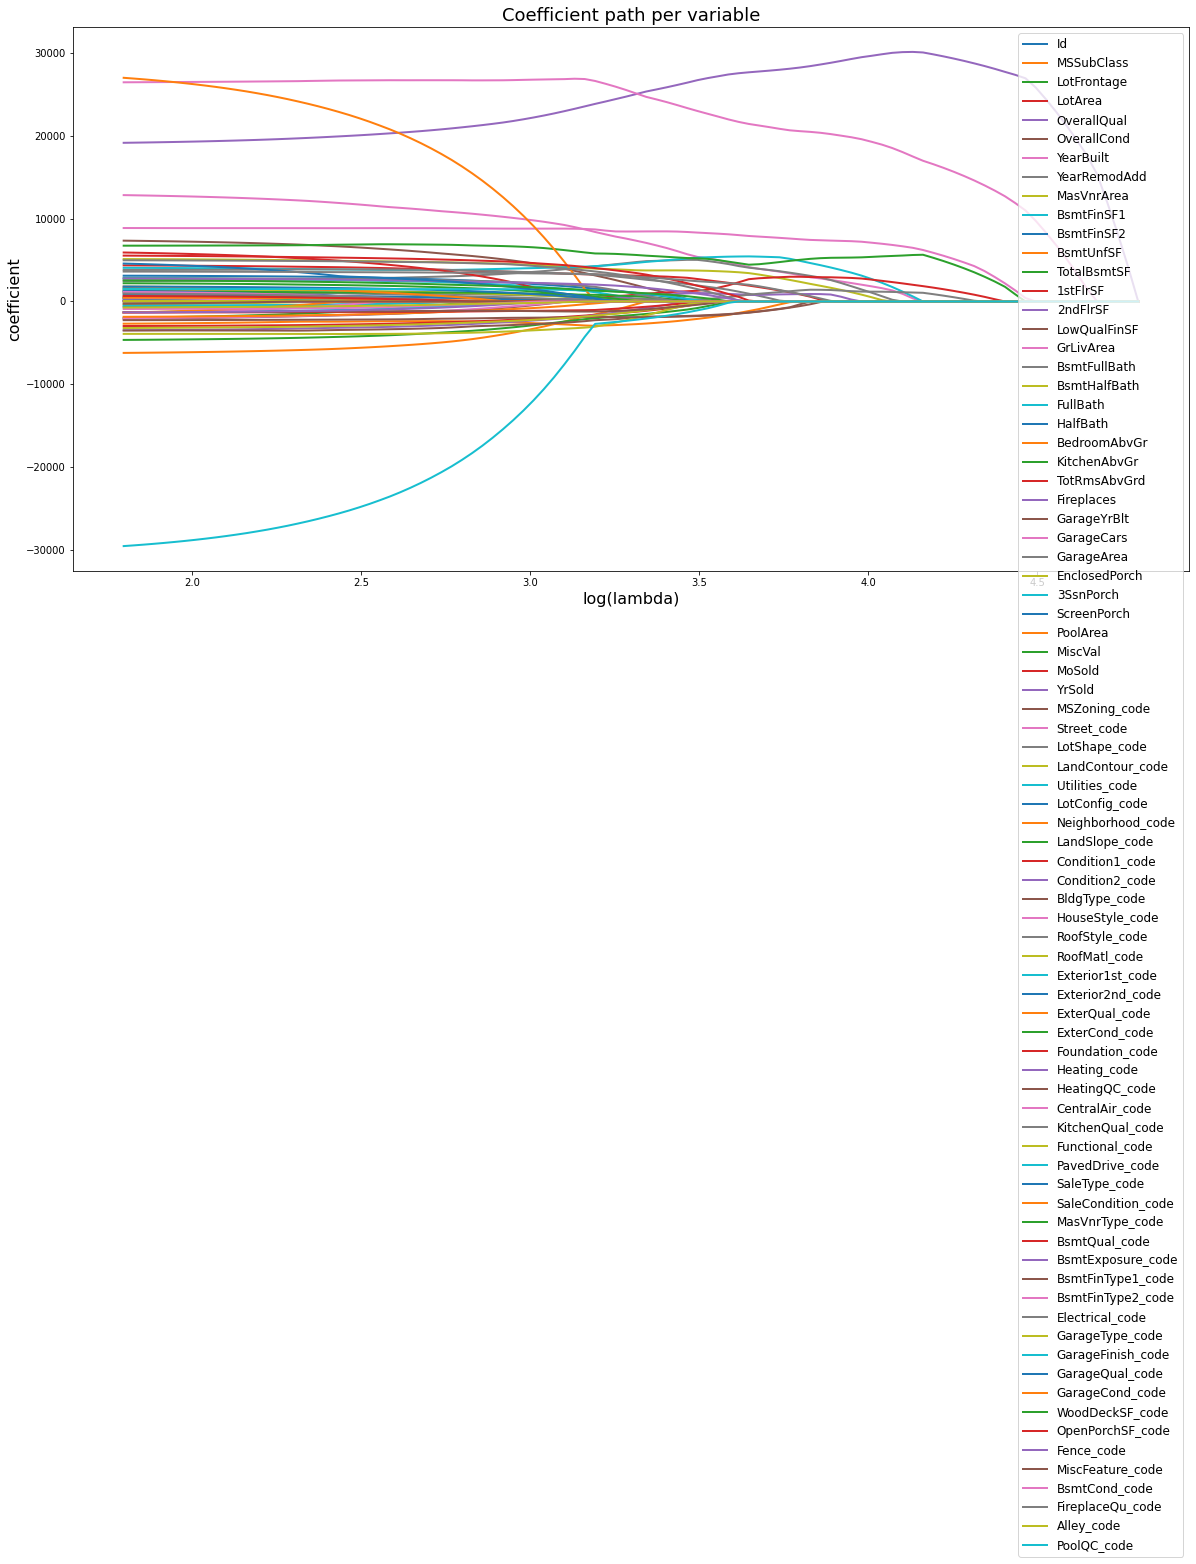

In [ ]:
from sklearn.linear_model import LassoCV
cv_k = 10
LassoReg = LassoCV(cv=cv_k, random_state=0)
LassoReg.fit(data_scaled, labels)
alphas, coefs = LassoReg.path(data_scaled, labels)[:2]
plt.figure(figsize=(20,10))
plt.title('Coefficient path per variable',fontsize=18)
for i, c in enumerate(coefs):
    plt.plot(np.log10(alphas), c, lw=2)
plt.legend(data2.columns, fontsize=12)
plt.xlabel('log(lambda)', fontsize=16)
plt.ylabel('coefficient', fontsize=16)
plt.show()

From the plot of *coeficient* vs *log(lambda)* we can see that after that *log(lambda) > 6.5* we are left only with this variable 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea', 'GarageArea', 'YrSold'. But here we can't say whether that's an optimal value by above graph. We need to check our cross-validation results on MSE.

Best lambda result is: 890.4010618615466
Best log(lambda) result is: 6.7916719925275


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa9c7597bd0> has a label of '_' which cannot be automatically added to the legend.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa9c7597d90> has a label of '_' which cannot be automatically added to the legend.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa9c7597f50> has a label of '_' which cannot be automatically added to the legend.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa9c756d510> has a label of '_' which cannot be automatically added to the legend.
  from ipykernel import kernelapp as 

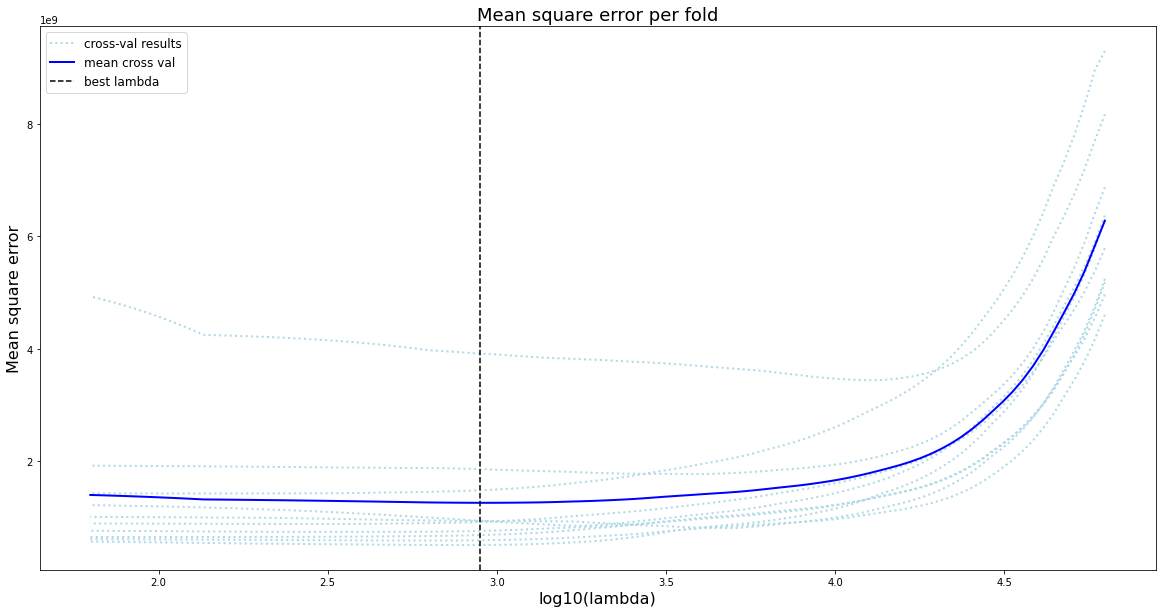

In [ ]:
plt.figure(figsize=(20,10))
alpha = LassoReg.alpha_
print('Best lambda result is:', alpha)
print('Best log(lambda) result is:', np.log(alpha))

m_log_alphas = np.log10(LassoReg.alphas_)
plt.plot(m_log_alphas, LassoReg.mse_path_, ':', linewidth=2, c='lightblue')
plt.plot(m_log_alphas, LassoReg.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2, c='b')
plt.xlabel('log10(lambda)')
plt.ylabel('Mean square error')
plt.title('Mean square error per fold')
plt.axvline(np.log10(alpha), linestyle='--', color='black', label='lambda best')
plt.legend(['cross-val results', 'mean cross val', 'best lambda'])
plt.show()

Best lambda result is 890.4 and best log(lambda) result is 6.79.

### D

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.linspace(0.1, 100), fit_intercept=False)
ridge.fit(data_scaled, labels)
ridge.alpha_

100.0

In [ ]:
# define model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data_scaled, labels)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
#ridge.best_params_

MAE: -20695.798
Config: {'alpha': 0.99}


Linear regression on scaled data

In [ ]:
model = sm.OLS(labels, data_scaled)
results = model.fit()
results.params

x1     -2754.169876
x2     -2160.736773
x3      4445.856912
x4     18939.937732
x5      7536.384314
           ...     
x75     -371.416274
x76     -929.501097
x77     3642.896000
x78     -794.831308
x79   -30749.710046
Length: 79, dtype: float64

In [ ]:
beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(data_scaled.transpose(), data_scaled)), data_scaled.transpose()), labels)
residual = labels - np.matmul(data_scaled, beta_hat)  # calculate the residual
sigma_hat = sum(residual ** 2) / (100 - 2 - 1)  # estimate of error term variance
variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(data_scaled.transpose(), data_scaled))  # Calculate variance of OLS estimate
variance_beta_hat


array([[ 1.87689852e+09, -9.67771990e+06, -6.71016510e+07, ...,
        -1.08578791e+06, -3.90603898e+07, -1.88225776e+08],
       [-9.67771990e+06,  6.21918227e+08, -6.21253282e+07, ...,
         1.19950592e+07,  4.50414264e+07, -2.87371751e+07],
       [-6.71016510e+07, -6.21253282e+07,  5.98972093e+08, ...,
         2.60370034e+07, -9.94092716e+05, -3.83556676e+07],
       ...,
       [-1.08578791e+06,  1.19950592e+07,  2.60370034e+07, ...,
         8.19413303e+08,  2.34075984e+06,  3.55809628e+07],
       [-3.90603898e+07,  4.50414264e+07, -9.94092716e+05, ...,
         2.34075984e+06,  4.80116268e+08, -3.54706285e+07],
       [-1.88225776e+08, -2.87371751e+07, -3.83556676e+07, ...,
         3.55809628e+07, -3.54706285e+07,  3.58108097e+09]])

## 2

### A

In [ ]:
data.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

Let's use WMSE function as a loss function to find out the best threshold value *T of GrLivArea* for the first split of data.
Let's write an optimization problem in the following manner:

$
minimize
$
$
L(T) = MSE(P_{left}(T))\frac{n_{left}}{N}+MSE(P_{right}(T))\frac{n_{right}}{N} 
$

,where

$
MSE(P) = \frac{1}{N_{P}} \sum_{i \in P}(y_{i} - \bar{y})^{2};
\\
P_{left}(T)=\{(x, y) | x_{GrLivArea}\leq T\};
\\
P_{right}(T)=\{(x, y) | x_{GrLivArea}>T\};
$
a.k.a. Mean Squared Error in the node;

$P_{left}(T)$ or $P_{right}(T)$ - data for the left or right node after splitting using threshold value T;
    
T - threshold;
    
(x, y) - instances of data;
    
N - total number of samples;

$n_{right}$ or $n_{left}$ - number of samples in right or left node;

$\bar{y}$ - average value of $y$ for the right or left node;


**Explanation**:

Optimization works by finding the threshold value of $T$ that splits data to the $right$ and $left$ nodes in a such manner that MSE of left and right node, weighted by proportion of samples in corresponding nodes, are minimum across all thresholds. 

Let's use WMSE function as a loss function to find out the best threshold value *T of GrLivArea* for the first split of data.
Let's write an optimization problem in the following manner:

$
minimize
$
$
L(T) = MSE(P_{left}(T))\frac{n_{left}}{N}+MSE(P_{right}(T))\frac{n_{right}}{N} 
$

,where

$
MSE(P) = \frac{1}{N_{P}} \sum_{i \in P}(y_{i} - \bar{y})^{2};
\\
σ
\\
$



### B

Here we need to implement recursive binary split. Here is my try to implement it on R using rpy2.

In [ ]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd_df_2b = ro.conversion.py2rpy(data2[['GrLivArea']][:5])
print(r_from_pd_df_2b)

with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_labels_2b = ro.conversion.py2rpy(labels[:5])
print(r_from_labels_2b)

  GrLivArea
0      1710
1      1262
2      1786
3      1717
4      2198

<rpy2.rinterface.IntSexpVector object at 0x7fddac3af550> [RTYPES.INTSXP]


In [ ]:
robjects.r('''
           get_rss <- function(y, X, j, s) {
                    R1 = X[ , 'GrLivArea'] < s
                    R2 = X[ , 'GrLivArea'] >= s
                    pred_R1 = mean(y[R1])
                    pred_R2 = mean(y[R2])
                    (y[R1] - pred_R1)^2
                    rss = sum((y[R1] - pred_R1)^2) + sum((y[R2] - pred_R2)^2)
                    return(rss)
            }

           f <- function(train, labels) {
                    library(rpart)
                    rss = get_rss(labels, train, 'GrLivArea', 0)
                    # build grid for cut points s for predictor j = 1 and compute associated RSS
                    sgrid <- seq(0, 10, length.out = 100)
                    store_rss = matrix(0, 100, 1)
                    for (i in 1:100){
                      s = sgrid[i]
                      store_rss[i] = get_rss(labels, train, 'GrLivArea', s)
                    }
                    print(which.min(store_rss))
            }
            ''')
r_f = robjects.globalenv['f']
rf_model = (r_f(r_from_pd_df_2b, r_from_labels_2b))

[1] 1


In [ ]:
robjects.r('''
          # Initialize empty tree
create_empty_tree <- function(max_height) sapply(1:max_height, function(k) replicate(2**(k-1),c()))

# Create empty tree with max_height = 3
tree_struc <- create_empty_tree(max_height = 3)

grow_tree <- function(node_parent, max_height, tree_struc, height){
  # Sort x
  sorted_x <- sort(node_parent$x)

  # Fix best split index at 1
  best_split_ind <- 1

  # Assign instances to left or right nodes
  group <- ifelse(node_parent$x <= node_parent$x[best_split_ind], "left", "right")
  node_left <- node_parent[which(group == "left"), ]
  node_right <- node_parent[which(group == "right"), ]

  # Recursive call on left and right nodes
  if(height < max_height){
  tree_struc[[height]] <- node_parent
  tree_struc[[height + 1]][[1]] <- grow_tree(node_parent = node_left, max_height = max_height, tree_struc = tree_struc, height = height + 1)
  tree_struc[[height + 1]][[2]] <- grow_tree(node_parent = node_right, max_height = max_height, tree_struc = tree_struc, height = height + 1)
  }

  return(tree_struc)
}

grow_tree(node_parent = data, max_height = 3, tree_struc = tree_struc, height = 1)
          ''')
r_f = robjects.globalenv['grow_tree']
rf_model = (r_f(r_from_pd_df_2b, r_from_labels_2b))


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



RRuntimeError: ignored

### C

A categorical variable decision tree includes categorical target variables that are divided into two categories. For example, the categories can be ‘Yes’ or ‘No’. The categories mean that every stage of the decision process falls into one of the categories and there are no in-betweens.

To my mind I would preffer to deal with a binary target variable and a single predictor. That's why I would convert all prices under 130 000 to 1 and below or equal 130 000 to 0. Then we have 10 classes [1, 2, 3, 4,5, 6, 7, 8, 9, 10].

For example, we have 57% of the observations with class 1 had value 1, 23% of the observations with class 2 had value 1, 71% of the observations with class 3 had value 1, etc.

And how to select the optimal split? We order the classes by the associated percentages of observations that take the value 1(if it isn't ordered):

[3, 1, 2...] ↔ [0.71, 0.57, 0.23...]
Now we've created an ordering for the predictor. 
I would suggest to splits in the next way:
- is probability of observations higher than 50%(first split).
- add probability level to all others splits till the end.



Finding the optimal split of this "locally-ordered" predictor is straightforward, as it can be done as if the predictor really were ordered, and Breiman showed that the optimal split of the locally-ordered version of the predictor is also the optimal split of the unordered predictor itself.

then try all ordered splits
Tree will automatically choose the feature by analyzing the variance across each feature and choosing the split that provides the most benefit.

A decision tree has to convert continuous variables to have categories anyway. There are different ways to find best splits for numeric variables. In a 0:9 range, the values still have meaning and will need to be split anyway just like a regular continuous variable. If you considered each value as separate categories, you are basically just splitting at every possible point.

In [ ]:
data.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [ ]:
data.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

### D

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,Neighborhood_code,LandSlope_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,ExterQual_code,ExterCond_code,Foundation_code,Heating_code,HeatingQC_code,CentralAir_code,KitchenQual_code,Functional_code,PavedDrive_code,SaleType_code,SaleCondition_code,MasVnrType_code,BsmtQual_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Electrical_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,WoodDeckSF_code,OpenPorchSF_code,Fence_code,MiscFeature_code,BsmtCond_code,FireplaceQu_code,Alley_code,PoolQC_code
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,0,0,0,0,2,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,0,0,0,0,0,5,2007,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,0,0,0,0,9,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,272,0,0,0,0,2,2006,0,0,1,0,0,2,2,0,0,0,0,0,0,0,2,2,1,0,2,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,3,0,0,1,2,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,0,0,0,0,0,12,2008,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,4,0,0,0,1,0,0
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,0,320,0,0,700,10,2009,0,0,1,0,0,0,4,0,0,0,0,2,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3,5,1,1,0,0,0,0
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,0,0,0,0,0,8,2007,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,0,0,0,0,0,0,0,4,6,0,0,0,2,0,0
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,228,0,0,0,350,11,2009,0,0,1,0,0,2,6,0,2,0,0,0,0,0,3,3,1,0,1,0,0,0,1,0,0,0,0,2,0,2,1,1,0,0,0,0,0,5,7,0,1,0,1,0,0


In [ ]:
clf_1 = DTR().fit(data2, labels)
r2_score = clf_1.score(data2, labels)
print('R^2 score = {:.3f}'.format(r2_score))

R^2 score = 1.000


In [ ]:
clf_2 = DTR(max_leaf_nodes=11).fit(data2, labels)
r2_score = clf_2.score(data2, labels)
print('R^2 score = {:.3f}'.format(r2_score))

R^2 score = 0.779


I will also implement D CART and prune it to 10 splits in R. It will help me to resolve the next issues in simpliest way.

In [ ]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd_df = ro.conversion.py2rpy(data2)
print(r_from_pd_df)

with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_labels = ro.conversion.py2rpy(labels)
print(r_from_labels)

     MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt
0            60    65.00000    8450           7           5      2003
1            20    80.00000    9600           6           8      1976
2            60    68.00000   11250           7           5      2001
3            70    60.00000    9550           7           5      1915
4            60    84.00000   14260           8           5      2000
5            50    85.00000   14115           5           5      1993
6            20    75.00000   10084           8           5      2004
7            60    70.04996   10382           7           6      1973
8            50    51.00000    6120           7           5      1931
9           190    50.00000    7420           5           6      1939
10           20    70.00000   11200           5           5      1965
11           60    85.00000   11924           9           5      2005
12           20    70.04996   12968           5           6      1962
13           20    9

In [ ]:
print(type(r_from_pd_df))
#print(r_from_pd_df.MSSubClass)
print(f'This dataframe has {r_from_pd_df.ncol} columns and {r_from_pd_df.nrow} rows\n')
print(r_from_pd_df.colnames)
utils = importr("rpart")
#ro.library("rpart")

<class 'rpy2.robjects.vectors.DataFrame'>
This dataframe has 79 columns and 1460 rows

 [1] "MSSubClass"         "LotFrontage"        "LotArea"           
 [4] "OverallQual"        "OverallCond"        "YearBuilt"         
 [7] "YearRemodAdd"       "MasVnrArea"         "BsmtFinSF1"        
[10] "BsmtFinSF2"         "BsmtUnfSF"          "TotalBsmtSF"       
[13] "1stFlrSF"           "2ndFlrSF"           "LowQualFinSF"      
[16] "GrLivArea"          "BsmtFullBath"       "BsmtHalfBath"      
[19] "FullBath"           "HalfBath"           "BedroomAbvGr"      
[22] "KitchenAbvGr"       "TotRmsAbvGrd"       "Fireplaces"        
[25] "GarageYrBlt"        "GarageCars"         "GarageArea"        
[28] "EnclosedPorch"      "3SsnPorch"          "ScreenPorch"       
[31] "PoolArea"           "MiscVal"            "MoSold"            
[34] "YrSold"             "MSZoning_code"      "Street_code"       
[37] "LotShape_code"      "LandContour_code"   "Utilities_code"    
[40] "LotConfig_code"     "Ne

If some modules in R are not imported.

In [ ]:
packageNames = ('rpart', 'glmnet')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

# Running R in Python example installing packages:
if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/glmnet_4.1-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2318567 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

Here we can see that total amount of splits is 43. Let's try to set 10.

In [ ]:
robjects.r('''
           f <- function(train, labels) {

                    library(rpart)
                    model.rf <- rpart(labels ~ ., data = train, control=rpart.control(cp = 0.001))
                    summary(model.rf)
            }
            ''')
r_f = robjects.globalenv['f']
rf_model = (r_f(r_from_pd_df, r_from_labels))

Call:
rpart(formula = labels ~ ., data = train, control = rpart.control(cp = 0.001))
  n= 1460 

            CP nsplit rel error    xerror       xstd
1  0.454376253      0 1.0000000 1.0012840 0.07648214
2  0.116363062      1 0.5456237 0.5479607 0.04126012
3  0.062885351      2 0.4292607 0.4320346 0.03977451
4  0.038446968      3 0.3663753 0.3704246 0.02824706
5  0.019899595      4 0.3279284 0.3434596 0.03134342
6  0.018800424      5 0.3080288 0.3696400 0.03479591
7  0.018569083      6 0.2892283 0.3681292 0.03480717
8  0.014790208      7 0.2706593 0.3393890 0.03236143
9  0.011296996      8 0.2558691 0.3188205 0.03143285
10 0.009660985      9 0.2445721 0.3096238 0.03104394
11 0.009390075     10 0.2349111 0.3079084 0.03105154
12 0.008290764     11 0.2255210 0.2980079 0.03063759
13 0.007770603     12 0.2172302 0.2964763 0.03068303
14 0.006393257     13 0.2094596 0.2860978 0.02950478
15 0.005802894     14 0.2030664 0.2800917 0.02946621
16 0.003769481     15 0.1972635 0.2667006 0.02879061
17

And here we can see that total amount of splits is 10(11 nodes).

In [ ]:
robjects.r('''
           f <- function(train, labels) {

                    library(rpart)
                    model.rf <- rpart(labels ~ ., data = train, control=rpart.control(cp = 0.009), maxdepth = 12)
                    summary(model.rf)
            }
            ''')
r_f = robjects.globalenv['f']
rf_model = (r_f(r_from_pd_df, r_from_labels))
#model.rf.prune=prune(model.rf, cp=model.rf$cptable[cp.min, 1])                   

Call:
rpart(formula = labels ~ ., data = train, control = rpart.control(cp = 0.009), 
    maxdepth = 12)
  n= 1460 

            CP nsplit rel error    xerror       xstd
1  0.454376253      0 1.0000000 1.0022192 0.07658782
2  0.116363062      1 0.5456237 0.5495786 0.04151364
3  0.062885351      2 0.4292607 0.4335166 0.04004194
4  0.038446968      3 0.3663753 0.3733052 0.02878082
5  0.019899595      4 0.3279284 0.3350865 0.02840310
6  0.018800424      5 0.3080288 0.3542432 0.03330297
7  0.018569083      6 0.2892283 0.3482447 0.03316957
8  0.014790208      7 0.2706593 0.3343516 0.03286912
9  0.009660985      8 0.2558691 0.3091593 0.02926072
10 0.009390075      9 0.2462081 0.3079110 0.02917038
11 0.009000000     10 0.2368180 0.3061465 0.02921523

Variable importance
     OverallQual       GarageCars      TotalBsmtSF       GarageArea 
              36                9                8                8 
       YearBuilt        GrLivArea         1stFlrSF   ExterQual_code 
               6   

Here we can see from logs 10 splits

### E

The complexity parameter in rpart is the minimum improvement in the model needed at each node. It’s based on the cost complexity of the model. The cp value is a stopping parameter. It helps speed up the search for splits because it can identify splits that don’t meet this criteria and prune them before going too far.



It is the amount by which splitting that node improved the relative error.

Decrease cp to 0.0001

In [ ]:
robjects.r('''
           f <- function(train, labels) {

                    library(rpart)
                    model.rf <- rpart(labels ~ ., data = train, cp = 0.0001, maxdepth = 10)
                    summary(model.rf)
            }
            ''')
r_f = robjects.globalenv['f']
rf_model = (r_f(r_from_pd_df, r_from_labels))

Call:
rpart(formula = labels ~ ., data = train, cp = 1e-04, maxdepth = 10)
  n= 1460 

             CP nsplit rel error    xerror       xstd
1  0.4543762531      0 1.0000000 1.0012563 0.07641335
2  0.1163630617      1 0.5456237 0.5480933 0.04128951
3  0.0628853507      2 0.4292607 0.4317245 0.03978859
4  0.0384469681      3 0.3663753 0.3710461 0.02844680
5  0.0198995949      4 0.3279284 0.3420862 0.02945638
6  0.0188004242      5 0.3080288 0.3466725 0.03051490
7  0.0185690830      6 0.2892283 0.3460965 0.03069291
8  0.0147902076      7 0.2706593 0.3298379 0.03251593
9  0.0112969964      8 0.2558691 0.3111827 0.03127126
10 0.0096609854      9 0.2445721 0.3107956 0.03126711
11 0.0093900749     10 0.2349111 0.3131931 0.03217633
12 0.0082907639     11 0.2255210 0.3121201 0.03216141
13 0.0077706033     12 0.2172302 0.3048018 0.03217219
14 0.0063932570     13 0.2094596 0.2897070 0.03089678
15 0.0058028943     14 0.2030664 0.2858088 0.03087522
16 0.0037694813     15 0.1972635 0.2674954 0.0298

Here we increas cp. In the rpart() routine to create CART models, you specify the complexity parameter to which you want to prune your tree.

In [ ]:
robjects.r('''
           f <- function(train, labels) {

                    library(rpart)
                    model.rf <- rpart(labels ~ ., data = train, cp = 0.1)
                    summary(model.rf)
            }
            ''')
r_f = robjects.globalenv['f']
rf_model = (r_f(r_from_pd_df, r_from_labels))

Call:
rpart(formula = labels ~ ., data = train, cp = 0.1)
  n= 1460 

         CP nsplit rel error    xerror       xstd
1 0.4543763      0 1.0000000 1.0023365 0.07649430
2 0.1163631      1 0.5456237 0.5483174 0.04142078
3 0.1000000      2 0.4292607 0.4318672 0.03992514

Variable importance
     OverallQual       GarageCars       GarageArea      TotalBsmtSF 
              46               12               11                9 
       YearBuilt         1stFlrSF   ExterQual_code      GarageYrBlt 
               8                5                4                3 
KitchenQual_code  Foundation_code 
               1                1 

Node number 1: 1460 observations,    complexity param=0.4543763
  mean=180921.2, MSE=6.306789e+09 
  left son=2 (1231 obs) right son=3 (229 obs)
  Primary splits:
      OverallQual < 7.5    to the left,  improve=0.4543763, (0 missing)
      GarageCars  < 2.5    to the left,  improve=0.3650136, (0 missing)
      GrLivArea   < 1488   to the left,  improve=0.3280

With cp=0.1 we recieve subtree with 91 splits. With cp=0.0001 we recieve subtree with 2 splits. From the cells above we can see that cp argument helps speed up the search for splits because it can identify splits that don’t meet this criteria and prune them before going too far.

### F

We can compute effective complexity parameter per each split.

In [ ]:
#!pip install rpy2
from rpy2 import *

The value of improvement, paradoxically, generally, is not computed during CART fitting variance reduction procedure in sklearn. It is because algorithm:
- firstly performs optimization procedure, defined in **(a)**, per each variable, i.e. finds optimal threshold $T$ for each variable;
- then it just chooses such variable, which has the lowest loss function $L$ at its optimal split.

Nevertheless, we can define value of improvement as:

$$MSE_i = \frac{1}{K_i} \sum^{K_i}_{k=1}(y_k - \overline{y}_{Node_i})^2$$

$$\text{Improvement} = \frac{MSE_1 * K_1 - [MSE_2 * K_2 + MSE_3 * K_3]}{MSE_1 * K_1}$$


From the values which is reterned by rpart I can  value of improvement is:

$MSE_{1}$ = 6.306789e+09

$K1$ = 1460

$MSE_{2}$ = 2.426929e+09

$K2$ = 1231

$MSE_{3}$ = 8.893039e+09 

$K3$ = 229

(( 6.306789e+09 *1460) - (2.426929e+09*1231) - (8.893039e+09*229) ) /( 6.306789e+09 *1460)
$$\text{Improvement} = \frac{(6.306789e+09) * 1460 - ((2.426929e+09) * 1231 + (8.893039e+09) * 229)}{(6.306789e+09) * 1460}$$

And the improvement result is 0.45.

### G

Due to some reason I cannot use a module importance in rpy to find the importnace of model, that's why I attached screenshot of training process and we will consider this like variable importance. From the variable importance we can see this

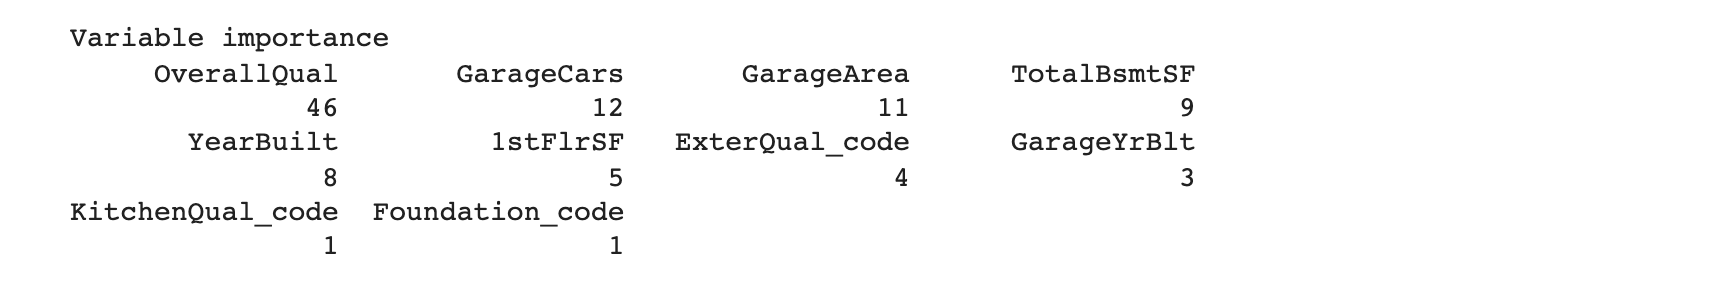

In [ ]:
reg = smf.ols('SalePrice ~ MSSubClass+MSZoning+LotFrontage+LotArea+Street+LotShape+LandContour+Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+BsmtFinSF2+BsmtUnfSF', data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     65.67
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:45:41   Log-Likelihood:                -16402.
No. Observations:                1413   AIC:                         3.311e+04
Df Residuals:                    1261   BIC:                         3.391e+04
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.887e+06   1.95e+05     -9.655      0.000   -2.27e+06    -1.5e+06
MSZoning[T.FV]           2.692e+04   1.42e+04      1.896      0.058    -930.283    5.48e+04
MSZoning[T.RH]           1.393e+04   1.43e+04      0.976      0.329   -1.41e+04    4.19e+04
MSZoning[T.RL]           2.413e+04   1.21e+04      1.999      0.046     451.151    4.78e+04
MSZoning[T.RM]           1.892e+04   1.12e+04      1.682      0.093   -3147.414     4.1e+04
Street[T.Pave]           2.868e+04   1.42e+04      2.017      0.044     777.558    5.66e+04
LotShape[T.IR2]          6080.6471   5129.918      1.185      0.236   -3983.468    1.61e+04
LotShape[T.IR3]         -2092.8536   1.04e+04     -0.202      0.840   -2.24e+04    1.83e+04
LotShape[T.Reg]          -462.8239   1960.242     -0.236      0.813   -4308.520    3382.872
LandContour[T.HLS]       4162.5141   6140.668      0.678      0.498   -7884.537    1.62e+04
LandContour[T.Low]      -1.624e+04   7802.507     -2.082      0.038   -3.16e+04    -936.609
LandContour[T.Lvl]       4054.8694   4440.426      0.913      0.361   -4656.567    1.28e+04
Utilities[T.NoSeWa]     -2.766e+04   3.05e+04     -0.908      0.364   -8.74e+04    3.21e+04
LotConfig[T.CulDSac]     9019.1388   4045.653      2.229      0.026    1082.187     1.7e+04
LotConfig[T.FR2]        -8783.8381   4883.129     -1.799      0.072   -1.84e+04     796.113
LotConfig[T.FR3]         -1.76e+04   1.53e+04     -1.147      0.252   -4.77e+04    1.25e+04
LotConfig[T.Inside]      -902.6089   2164.328     -0.417      0.677   -5148.690    3343.472
LandSlope[T.Mod]         1.004e+04   4790.674      2.095      0.036     638.431    1.94e+04
LandSlope[T.Sev]        -3.664e+04   1.28e+04     -2.868      0.004   -6.17e+04   -1.16e+04
Neighborhood[T.Blueste] -5427.3335    2.3e+04     -0.236      0.814   -5.06e+04    3.98e+04
Neighborhood[T.BrDale]  -2.821e+04    1.3e+04     -2.171      0.030   -5.37e+04   -2715.928
Neighborhood[T.BrkSide] -2.198e+04    1.1e+04     -1.994      0.046   -4.36e+04    -353.842
Neighborhood[T.ClearCr] -3.338e+04    1.1e+04     -3.043      0.002   -5.49e+04   -1.19e+04
Neighborhood[T.CollgCr]  -3.17e+04   8392.420     -3.778      0.000   -4.82e+04   -1.52e+04
Neighborhood[T.Crawfor] -3098.8757   1.01e+04     -0.308      0.758   -2.29e+04    1.67e+04
Neighborhood[T.Edwards] -3.732e+04   9312.399     -4.008      0.000   -5.56e+04   -1.91e+04
Neighborhood[T.Gilbert] -3.253e+04   9117.843     -3.568      0.000   -5.04e+04   -1.46e+04
Neighborhood[T.IDOTRR]  -3.078e+04   1.25e+04     -2.460      0.014   -5.53e+04   -6229.740
Neighborhood[T.MeadowV]  -2.31e+04   1.32e+04     -1.750      0.080    -4.9e+04    2794.147
Neighborhood[T.Mitchel] -4.504e+04   9601.410     -4.690      0.000   -6.39e+04   -2.62e+04
Neighborhood[T.NAmes]   -3.657e+04   9116.808  

In the cell above we have $Linear$ $regression$ and below we can use t-values to determine the importances. The most importance variables have higher values. I determined 3.5 as the point of determining the importances.


In [ ]:
for key, value in reg.tvalues.items():
    if value > 3.5:
        print(key)

HouseStyle[T.2.5Fin]
HouseStyle[T.2Story]
RoofMatl[T.CompShg]
RoofMatl[T.Membran]
RoofMatl[T.Metal]
RoofMatl[T.Roll]
RoofMatl[T.Tar&Grv]
RoofMatl[T.WdShake]
RoofMatl[T.WdShngl]
Exterior1st[T.AsphShn]
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF


Here we can see variables importance from $Linear$ $Regression$.

HouseStyle

RoofMatl

Exterior1st

LotFrontage

LotArea

OverallQual

OverallCond

YearBuilt

YearRemodAdd

MasVnrArea

BsmtFinSF1

BsmtFinSF2

BsmtUnfSF

Variable importance from $Lasso$ is determined by how huge is coeficient. Bigger coeficient - bigger importance. In 1c block I mentioned which variables have big coeficient. They are - 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea', 'GarageArea', 'YrSold'. 

Comparing this variables we can to summarize that there are variable which are important for all 3 models:
- LotArea
- YearBuilt

Some variables are related to two models:
- OveralQual
- GrLivArea
- GarageArea
- TotalBsmtSF

And there are a lot of unique fields.


### H


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data2h = data.select_dtypes(include=numerics)
data2h = pd.DataFrame(data2h).fillna(data2h.mean())
data2h.drop('Id', axis=1, inplace=True)
labels2h = data.SalePrice.copy()
#data2h.drop('SalePrice', axis=1, inplace=True)
data2h = data2h[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'SalePrice']]
data2h

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,142125


In the cells below I applied bootstrap techniques to the selected columns

In [ ]:
# resample from our sample
bootstrapped = data2h.sample(frac=1, replace=True).head()
bootstrapped.shape

(5, 11)

In [ ]:
repeats = bootstrapped['MSSubClass'].value_counts()
repeats.head()

20     3
180    1
120    1
Name: MSSubClass, dtype: int64

In [ ]:
def bootstrap_mean(data, varname):
    bootstrapped = data.sample(n=len(data), replace=True)
    return bootstrapped[varname].mean()

In [ ]:
def summarize(t, digits=2):
    table = pd.DataFrame(columns=['Mean', 'Standard error', 'Confidence interval'])
    mean = np.mean(t).round(digits)
    stde = np.std(t).round(digits)
    confidence_interval = np.percentile(t, [2.5, 97.5]).round(digits)
    table.loc[''] = mean, stde, confidence_interval
    return table

In [ ]:
def simulate_sample_mean(n, mu, sigma):
    sample = np.random.normal(mu, sigma, size=n)
    return sample.mean()

n_realinc = data2h['SalePrice'].notna().sum()
mean_realinc = data2h['SalePrice'].mean()
std_income = data2h['SalePrice'].std()
print(mean_realinc, std_income)

t1 = [simulate_sample_mean(n_realinc, mean_realinc, std_income)
     for i in range(1000)]

summary1 = summarize(t1, digits=1)

180921.19589041095 79442.50288288663


In [ ]:
def plot_hist(x, p=5):
    plt.hist(x, alpha = .5)
    plt.axvline(x.mean())
    # 95% confidence interval 
    plt.axvline(np.percentile(x, p / 2.), color="red", linewidth = 3)
    plt.axvline(np.percentile(x, 100 - p/2.), color="red", linewidth = 3)
 
def plot_dists(a, nbins, a_label="pop_A", p=5):
    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    plt.tight_layout()

Below applying bootstrap tecnique on the parameters.

In [ ]:
dict_ = {}
for column in data2h.columns:
    n_real = data2h[column].notna().sum()
    mean_real = data2h[column].mean()
    std = data2h[column].std()
    print(mean_real, std)

    t1 = [simulate_sample_mean(n_real, mean_real, std)
        for i in range(1000)]

    dict_[column] = summarize(t1, digits=1)
    t3 = [bootstrap_mean(data2h, column)
          for i in range(1001)]

    dict_[column + ' bootstrap'] = summarize(t3)
dict_

56.897260273972606 42.30057099381035
70.04995836802642 22.024022688706943
10516.828082191782 9981.264932379147
6.0993150684931505 1.3829965467415923
5.575342465753424 1.1127993367127367
1971.267808219178 30.202904042525265
1984.8657534246574 20.645406807709396
103.68526170798896 180.5691124259736
443.6397260273973 456.09809084092456
46.54931506849315 161.31927280654057
180921.19589041095 79442.50288288663


{'BsmtFinSF1':    Mean  Standard error Confidence interval
   443.8            11.5      [421.4, 465.7],
 'BsmtFinSF1 bootstrap':     Mean  Standard error Confidence interval
   443.22           11.66    [420.62, 464.51],
 'BsmtFinSF2':   Mean  Standard error Confidence interval
   46.7             4.3        [38.5, 54.9],
 'BsmtFinSF2 bootstrap':    Mean  Standard error Confidence interval
   46.64             4.2      [38.53, 55.14],
 'LotArea':      Mean  Standard error Confidence interval
   10507.9           261.1  [10001.0, 11031.8],
 'LotArea bootstrap':       Mean  Standard error   Confidence interval
   10510.09          269.44  [10037.87, 11078.28],
 'LotFrontage':   Mean  Standard error Confidence interval
   70.1             0.5        [69.0, 71.2],
 'LotFrontage bootstrap':    Mean  Standard error Confidence interval
   70.04            0.58      [68.92, 71.17],
 'MSSubClass':   Mean  Standard error Confidence interval
   56.9             1.1        [54.8, 59.2],
 'MSSubCl

### I

Confidence interval 2.5% and 97.5% with 95% confidence.

In [ ]:
for key, value in dict_.items():
    print(dict_.get(key)['Confidence interval'])
    #table = pd.concat([dict_.get('YearRemodAdd'), dict_.get('YearBuilt')])
    #table.index=['normal model', 'bootstrapping']
    #table

    [54.8, 59.2]
Name: Confidence interval, dtype: object
    [54.89, 58.96]
Name: Confidence interval, dtype: object
    [69.0, 71.2]
Name: Confidence interval, dtype: object
    [68.92, 71.17]
Name: Confidence interval, dtype: object
    [10001.0, 11031.8]
Name: Confidence interval, dtype: object
    [10037.87, 11078.28]
Name: Confidence interval, dtype: object
    [6.0, 6.2]
Name: Confidence interval, dtype: object
    [6.02, 6.17]
Name: Confidence interval, dtype: object
    [5.5, 5.6]
Name: Confidence interval, dtype: object
    [5.52, 5.64]
Name: Confidence interval, dtype: object
    [1969.7, 1972.8]
Name: Confidence interval, dtype: object
    [1969.79, 1972.73]
Name: Confidence interval, dtype: object
    [1983.9, 1986.0]
Name: Confidence interval, dtype: object
    [1983.77, 1985.92]
Name: Confidence interval, dtype: object
    [94.2, 112.5]
Name: Confidence interval, dtype: object
    [94.06, 112.9]
Name: Confidence interval, dtype: object
    [421.4, 465.7]
Name: Confidence

here we can see the confidence inteval defined by 2.5 and 97.5

### J

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=20,
                                 max_samples=500,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(data2, labels)
#
# Model scores on training data
#
print('Model training Score: %.3f' %bgclassifier.score(data2, labels))

Model training Score: 0.898


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(data2, labels)
print('Model training Score: %.3f' %clf.score(data2, labels))

Model training Score: 0.851


--- 48.43758034706116 seconds ---


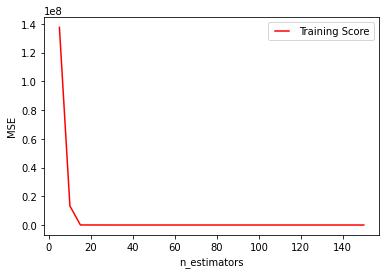

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100, 120, 130, 140, 150]

start_time = time.time()
for nb_trees in list_nb_trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(data2, labels)

    train_results.append(mean_squared_error(labels, rf.predict(data2)))

print("--- %s seconds ---" % (time.time() - start_time))
line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('number of trees')
plt.show()

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be 

--- 76.00783848762512 seconds ---


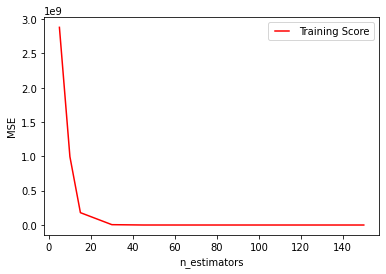

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
train_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100, 120, 130, 140, 150]

start_time = time.time()
for nb_trees in list_nb_trees:
    #(base_estimator=pipeline
    bgclassifier = BaggingClassifier(n_estimators=nb_trees,
                                    max_features=20,
                                    max_samples=500,
                                    random_state=1, n_jobs=5)
    bgclassifier.fit(data2, labels)
    train_results.append(mean_squared_error(labels, bgclassifier.predict(data2)))

print("--- %s seconds ---" % (time.time() - start_time))
line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('number of trees')
plt.show()

### K

Due to the random feature selection, the trees are more independent of each other compared to regular bagging, which often results in better predictive performance (due to better variance-bias trade-offs), and I’d say that it’s also faster than bagging, because each tree learns only from a subset of features.

In [ ]:
bgclassifier1 = BaggingClassifier(n_estimators=20,
                                    max_features=20,
                                    max_samples=500,
                                    random_state=1, n_jobs=5)
bgclassifier1.fit(data2, labels)

BaggingClassifier(max_features=20, max_samples=500, n_estimators=20, n_jobs=5,
                  random_state=1)

In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgclassifier.estimators_
], axis=0)
feats2 = {}
for feature, importance in zip(data2.columns, feature_importances):
    feats2[feature] = importance #add the name/value pair 
importances2 = pd.DataFrame.from_dict(feats2, orient='index').rename(columns={0: 'Gini-importance'})
importances2.sort_values(by='Gini-importance')#.plot(kind='bar', rot=45)
importances2[:10]
#feature_importances

,Gini-importance
Id,0.053301
MSSubClass,0.052692
LotFrontage,0.050228
LotArea,0.046063
OverallQual,0.051235
OverallCond,0.046299
YearBuilt,0.052656
YearRemodAdd,0.058926
MasVnrArea,0.043356
BsmtFinSF1,0.051049


In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data2.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance')#.plot(kind='bar', rot=45)
importances[:10]

,Gini-importance
Id,0.039361
MSSubClass,0.013303
LotFrontage,0.030998
LotArea,0.034487
OverallQual,0.016989
OverallCond,0.015268
YearBuilt,0.029432
YearRemodAdd,0.026070
MasVnrArea,0.020635
BsmtFinSF1,0.028242


In the cell above we can see 10 the most important variables by random forest and bagging.

The importance of a feature in my software is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In comparing we can find the features which are related to all models. They are realted to all models LR, single tree, lasso bagging, random forest:

- LotArea
- YearBuilt


Some variables are related to 4 models:

- OveralQual

Some are related to few of models

- YearRemodAdd.


And there are a lot of combinations of pairs(mostly in bagging and random forest).

## 3

here we are converting SalePrice > 130000 to 1, else 0.

In [ ]:
labels2 = labels.copy()
labels2.loc[(labels2 <= 130000)] = 0
labels2.loc[(labels2 > 130000)] = 1
labels2

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
model_with_all_parameters = sm.OLS(labels, data2).fit()

Fitting model:

### A

In [ ]:
X_ = sm.add_constant(data2)
LogR = sm.Logit(labels2, X_).fit(random_state=30, maxiter = 200)
LogR.summary()

         Current function value: 0.146872
         Iterations: 200


LinAlgError: ignored

This result says that, holding all the other variables fixed, after one unit increase of LotArea the odds of Saleprice decrease by ~ 0.00019.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data3 = data.select_dtypes(include=numerics)
data3 = pd.DataFrame(data3).fillna(data3.mean())
data3.drop('Id', axis=1, inplace=True)
data3.drop('SalePrice', axis=1, inplace=True)
data3

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data3, labels2, test_size=0.2)

In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
23,120,44.000000,4224,5,7,1976,1976,0.0,840,0,200,1040,1060,0,0,1060,1,0,1,0,3,1,6,1,1976.0,2,572,100,110,0,0,0,0,0,6,2007
1418,20,71.000000,9204,5,5,1963,1963,0.0,25,872,247,1144,1144,0,0,1144,1,0,1,1,3,1,6,0,1962.0,1,336,0,88,0,0,0,0,0,8,2008
1146,20,70.049958,11200,6,5,1985,1985,85.0,1258,0,40,1298,1298,0,0,1298,1,0,2,0,3,1,5,1,1985.0,2,403,165,26,0,0,0,0,0,5,2006
849,80,80.000000,9600,6,7,1976,1994,360.0,0,0,528,528,1094,761,0,1855,0,0,2,1,3,1,7,1,1976.0,2,512,113,100,0,0,0,0,0,8,2007
102,90,64.000000,7018,5,5,1979,1979,0.0,0,0,0,0,1535,0,0,1535,0,0,2,0,4,2,8,0,1979.0,2,410,0,0,0,0,0,0,0,6,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,20,70.049958,15870,5,5,1969,1969,0.0,75,791,230,1096,1096,0,0,1096,1,0,1,0,3,1,6,0,1969.0,1,299,240,32,0,0,0,0,0,3,2006
444,60,70.000000,8750,7,5,1994,1995,0.0,642,0,273,915,933,975,0,1908,1,0,2,1,4,1,8,1,1994.0,2,493,144,133,0,0,0,0,0,7,2008
171,20,141.000000,31770,6,5,1960,1960,112.0,639,0,441,1080,1656,0,0,1656,1,0,1,0,3,1,7,2,1960.0,2,528,210,62,0,0,0,0,0,5,2010
235,160,21.000000,1680,6,3,1971,1971,604.0,358,0,125,483,483,504,0,987,0,0,1,1,2,1,5,0,1971.0,1,264,0,0,0,0,0,0,0,8,2008


In [ ]:
column_names = X_train.columns.tolist()

def stepwise_selection(X, y, regressors_left):
    selected_regressors = []
    scores = []
    #creating default starting best score as np.inf as its bigger than any future scores and suitable for starting loop
    best_score = np.inf 
    # assigning current score to starting best score
    score = best_score
    # looping until either all independent variables are used in all possible combinations or when further fit give no
    # improvement in AIC 
    while regressors_left != [] and score==best_score:
        regressor_score = []
        for regressor in regressors_left:
            X_selected = X.loc[:, selected_regressors+[regressor]]
            X_selected_ = sm.add_constant(X_selected)
            model_res = sm.Logit(y, X_selected_).fit(maxiter=17)
            regressor_score.append(model_res.aic)
        i = np.argmin(regressor_score) 
        score = regressor_score[i]
        if (score < best_score):
            best_score = score 
            selected_regressors.append(regressors_left[i])
            scores.append(score)
            del regressors_left[i]
    last_regressor = regressors_left[i]
    last_score = score
    print('AIC selection. Picked {} variables:\n{}'.format(len(selected_regressors), selected_regressors))
    return selected_regressors, last_regressor, scores, last_score, model_res

selected_regressors, last_regressor, scores_selected, last_score, model_res = stepwise_selection(X_train, y_train, column_names)

Optimization terminated successfully.
         Current function value: 0.566994
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.526657
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.509624
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383514
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.567878
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.431697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.458772
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.526492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.532440
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567640
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.383135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340880
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.330313
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.383288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.349262
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380573
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.364965
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.374816
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.319650
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.328371
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.321808
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309399
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.328335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.326833
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.328124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.321948
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315965
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305978
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.330265
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.292070
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283644
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271727
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279219
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282382
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286223
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292954
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291581
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.260755
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.270058
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.255017
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269613
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.266183
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.261698
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269813
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269813
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.258890
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.268768
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.233506
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.246202
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.244311
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.236108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.246300
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.246300
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.236798
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.246160
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245590
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245750
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.226048
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.226048
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.217631
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.226030
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.225634
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.224873
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.225369
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.220099
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.225430
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.220394
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.214429
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213133
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214032
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208802
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214213
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.209114
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214188
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.210844
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.211182
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.211984
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.207716
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208254
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208799
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204610
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208736
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.205215
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205592
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206040
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208313
 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.204346
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203351
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202429
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204595
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204102
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204102
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204393
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204393
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202063
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204535
 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.199364
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.198941
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.198941
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199407
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199407
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196839
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199389
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199409
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.198880
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.198808
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.195904
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195904
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.193583
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195845
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195945
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195260
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195862
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195846
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195916
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195804
 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.192453
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193298
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193055
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192937
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192870
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191285
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.193248
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193028
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193227
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.193231
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.190337
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189811
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191207
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191080
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191080
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191157
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191157
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189816
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191131
 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.188983
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188983
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189117
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189117
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187830
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189223
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188642
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189220
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.18876

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.187282
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187733
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187353
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187387
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187463
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187355
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187826
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187280
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.18773

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.187740
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187607
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187643
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.185646
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186262
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186267
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186267
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186259
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.186259
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.18

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


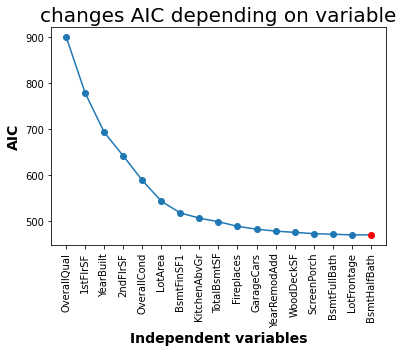

In [ ]:
x_ax = selected_regressors + [last_regressor]
y_ax = scores_selected + [last_score]
plt.figure()
plt.plot(x_ax, y_ax)
plt.scatter(x_ax[:-1], scores_selected)
plt.scatter(x_ax[-1], last_score, color='r', zorder=10)
plt.xticks(rotation='vertical')
plt.xlabel('Independent variables',fontsize=14,fontweight='bold')
plt.ylabel('AIC',fontsize=14,fontweight='bold')
plt.title('changes AIC depending on variable',fontsize=20)
plt.show()

In [ ]:
selected_regressors
X_selected = X_train.loc[:, selected_regressors]
X_selected = sm.add_constant(X_selected)
model_with_selected_features = sm.Logit(y_train, X_selected)
result = model_with_selected_features.fit(random_state=30)

Optimization terminated successfully.
         Current function value: 0.186326
         Iterations 10


In [ ]:
result.params

const          -155.875642
OverallQual       0.651334
1stFlrSF          0.004300
YearBuilt         0.053574
2ndFlrSF          0.005126
OverallCond       0.715127
LotArea           0.000202
BsmtFinSF1        0.001105
KitchenAbvGr     -1.801368
TotalBsmtSF       0.001887
Fireplaces        0.756781
GarageCars        0.495219
YearRemodAdd      0.017124
WoodDeckSF        0.002534
ScreenPorch       0.006465
BsmtFullBath      0.554536
LotFrontage       0.017718
dtype: float64

### B

Estimation cannot be perfommed using like some MSE, because we don't have any residual in logit, we have just probabilities and we have some variables on the right inside. And the only way to estimate the logit is using the Maximum Likelihood estimation. That's why were we are calling fit the model is using maximum likelihood.

In the cell bellow we are extracting parameter of LotArea from fitted model.

In [ ]:
result.params.LotArea

0.00019025696187341317

We can convert log-odds to odds by exponentiation

In [ ]:
np.exp(result.params.LotArea)

1.000190275061877

The variable LotArea has an odds ratio of 1.00019 which suggests for one unit increase in LotArea we expect that about 1.00019 times increase the odds of house being above 130000 (assuming all other independent variables constant). All our other independent variables can be interpreted in the same way.

after one unit increase of LotArea the odds of SalePrice increase by ~ 0.00019025

### C

Variables, which increase the probality of the SalePrice be aboe 130000(Y=1) are:

In [ ]:
result.params[result.params > 0]

OverallQual     0.651334
1stFlrSF        0.004300
YearBuilt       0.053574
2ndFlrSF        0.005126
OverallCond     0.715127
LotArea         0.000202
BsmtFinSF1      0.001105
TotalBsmtSF     0.001887
Fireplaces      0.756781
GarageCars      0.495219
YearRemodAdd    0.017124
WoodDeckSF      0.002534
ScreenPorch     0.006465
BsmtFullBath    0.554536
LotFrontage     0.017718
dtype: float64

Variables which are decreasing the probability.

In [ ]:
result.params[result.params <= 0]

const          -155.875642
KitchenAbvGr     -1.801368
dtype: float64

Let's consider the next variables which has sufficient impact on the probabilities:

- OverallQual - overall material and finish quality; 0.651
- OverallCond - overall condition rating; 0.715
- GarageCars - size of garage; 0.495
- Fireplaces - number of fireplaces; 0.756
- BsmtFullBath - basement full bathrooms. 0.554

To my mind, all these variables play important role on SalePrice probability. Just with economic intuition GarageCars, BsmtFullBath and Fireplaces means something which is very expensive. Cheap houses cannot have garage and several fireplaces.

OverallQual and OverallCond are important as well because if we are using expensive materials and expensive builder is building a house than it will have an impact on the price. It will be higher.

That's why this 5 variables have the impact on price more than 0.5. Some varibles have even more than 0.7.

I think it is consistant with economic intuition.

Another variables like YearBuilt, YearRemodAdd, LotFrontage, etc cannot have a huge impact on the price. Let's consider YearBuilt. It doesn't matter if house is built in 2000 or 2021 if it has GarageCars, BsmtFullBath and Fireplaces - it will still be very expensive and price will be over 130000. The same is related to another variables which has low probability.

To my mind think that KitchenAbvGr is decreasing price probability is not right with economic intuition. As we know kitchen can be very expensive that's why it should has a good impact on the price as it can be done in rich style.


### D

In [ ]:
np.random.seed(42)
random_numbers = np.random.randint(1, len(X_train), 5)
print(f'Random numbers: {random_numbers}')
for number in random_numbers:
    probability = result.predict(X_selected.loc[X_selected.index == number]).values
    if not probability:
        # in case if number isn't in train set
        new_number = np.random.randint(1, 100, 1)[0]
        print(f'{number} is replaced by {new_number}, because it doesn\'t exist in X_train')
        probability = result.predict(X_selected.loc[X_selected.index == new_number]).values
        number = new_number
    print(f'Number {number}. Probability for the price above 130000 : {probability[0]}')

Random numbers: [1127  861 1131 1096 1045]
Number 1127. Probability for the price above 130000 : 0.9999957742414981
861 is replaced by 83, because it doesn't exist in X_train
Number 83. Probability for the price above 130000 : 0.2153594563828077
Number 1131. Probability for the price above 130000 : 0.37191055166188464
Number 1096. Probability for the price above 130000 : 0.18633385364186714
Number 1045. Probability for the price above 130000 : 0.32633012977590437


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


The first selected house has the next parameters

In [ ]:
pd.concat([result.params, X_selected.iloc[1127]],axis=1)

,0,1449
const,-155.875642,1.0
OverallQual,0.651334,5.0
1stFlrSF,0.004300,630.0
YearBuilt,0.053574,1970.0
2ndFlrSF,0.005126,0.0
OverallCond,0.715127,7.0
LotArea,0.000202,1533.0
BsmtFinSF1,0.001105,553.0
KitchenAbvGr,-1.801368,1.0
TotalBsmtSF,0.001887,630.0


Formula for logit model, for the house with id=1127

$β_i = 0_i$

$x_i = 1127_i$

$p(y=1|x=1127) = g(β^Tx_1127) = \frac{1}{1 + e^{-(β_0+β_1x_1+β_2x_2+β_3x_3+β_4x_4+β_5x_5+β_6x_6+β_7x_7+β_8x_8+β_9x_9+β_{10}x_{10}+β_{11}x_{11}+β_{12}x_{12}+β_{13}x_{13}+β_{14}x_{14}+β_{15}x_{15}+β_{16}x_{16})}} = \frac{1}{1 + e^{-(-155.87+0.6513*5+0.0043*630.0 + 0.05*1970+0.715*7+0.0002*1533+0.0011*553-1.8+0.0018*630+0.01712*1970+0.554+0.0177*182)}} = \frac{1}{1 + e^{-8.6609}}$

If we want to classify a house, we have to write some threshold. If we use threshold of 0.5, and want our house to be in the first group, then:

$\frac{1}{1 + e^{-8.6609}} > 0.5$

The best approach to determine the group of the house is to establish a threshold, for example, 0.5. if probability is higher then 0.5 - then the house is above 130000, otherwise - it is less.

### E

In [ ]:
table_from_model = result.pred_table(0.5)
sum_true = np.sum(result.pred_table(0.5),axis=0)
final_col = np.vstack((table_from_model, sum_true))
confusion_matrix = pd.DataFrame(
    final_col,
    columns=['Actually 0','Actually 1'],
    index=['Predicted 0','Predicted 1','sum']
)
confusion_matrix['sum'] = confusion_matrix['Actually 0'] + confusion_matrix['Actually 1']
confusion_matrix.iloc[2, 2]='_'
confusion_matrix

,Actually 0,Actually 1,sum
Predicted 0,249.0,49.0,298
Predicted 1,37.0,833.0,870
sum,286.0,882.0,_


In this table we have:

- 'Actually 0' - amount of true 0;
- 'Actually 1' - amount of true 1;
- 'Predicted 0' - amount of predicted as 0;
- 'Predicted 1' - amount of predicted as 1.

Confusion matrix is built in the next way:

- pair of 'Actually 0' and 'Predicted 0' is TN(True Negative);
- pair of 'Actually 0' and 'Predicted 1' is FP(False Positive);
- pair of 'Actually 1' and 'Predicted 0' is FN(False Negative);
- pair of 'Actually 1' and 'Predicted 1' is TP(True Positive).


$
Specificity =  \frac{TN}{TN + FP}
$


Specificity (SP) is calculated as the number of correct negative predictions divided by the total number of negatives. It is also called true negative rate (TNR). The best specificity is 1.0, whereas the worst is 0.0.

In [ ]:
print(f'Specificity is: {249/286}')

Specificity is: 0.8706293706293706


$
Sensitivity =  \frac{TP}{TP + FN}
$


Sensitivity (SN) is calculated as the number of correct positive predictions divided by the total number of positives. It is also called recall (REC) or true positive rate (TPR). The best sensitivity is 1.0, whereas the worst is 0.0.

In [ ]:
print(f'Sensitivity is: {833/882}')

Sensitivity is: 0.9444444444444444


$
Accuracy =  \frac{TP + TN}{TP + FP + TN + FN}
$


Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. The best accuracy is 1.0, whereas the worst is 0.0. It can also be calculated by 1 – ERR.

In [ ]:
print(f'Accuracy is: {(249 + 833) / (286 + 882)}')

Accuracy is: 0.9263698630136986


### F

ROC AUC is another approach of estimation of model's quality.

An ROC curve is a graph that is showing the performance of a classification model at all classification thresholds. This curve plots two parameters - True Positive Rate and False Positive Rate. True Positive Rate is the same as Recall and we have a formulla and explanation above. False Positive Rate is definide below:

$
False Positive Rate =  \frac{FP}{TN + FP}
$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

To compute the points in an ROC curve, we could evaluate a Logit model a lot of times with various thresholds, but it is not efficient. That's why we can use sorting-based algorithm that can provide this information for us and it is called AUC.

The idea of using the ROC curve for tuning the threshold is to identify that threshold that gives us the upper-left corner of the curve.
Mathematically speaking, that threshold p that satisfies the equation:

$
TPR(p) = 1−FPR(p)
$

It is equivalent to find the value of p for which the True Positive Rate is equal to the True Negative Rate (which is 1-FPR).

We can easily calculate all the objects we need using the following coommand - metrics.roc_curve


Threshold is [2.00000000e+00 1.00000000e+00 9.97593639e-01 9.97443281e-01
 9.95654036e-01 9.95489767e-01 9.62748126e-01 9.60761581e-01
 9.39295943e-01 9.34845477e-01 8.35052126e-01 8.17123937e-01
 6.12130946e-01 5.62391870e-01 5.37734138e-01 5.00160817e-01
 4.86241252e-01 4.55855957e-01 4.49447860e-01 4.42837443e-01
 4.09495045e-01 4.03699917e-01 3.99489196e-01 3.81763082e-01
 3.49231823e-01 3.32777323e-01 3.29047432e-01 3.26328568e-01
 3.22314794e-01 2.25730267e-01 2.15627145e-01 2.00571301e-01
 1.97355457e-01 1.44245949e-02 1.36314462e-02 6.50448647e-05]


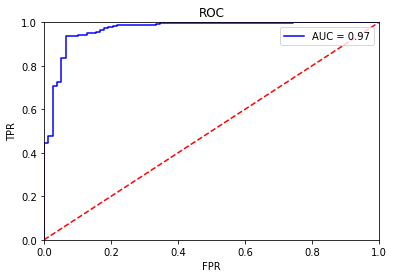

In [ ]:
X_selected_test = X_test.loc[:, selected_regressors]
X_selected_test_ = sm.add_constant(X_selected_test)
preds = result.predict(X_selected_test_)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
print(f"Threshold is {thresholds}")
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

We can plot the objective function with respect to the threshold and see where its minimum is.

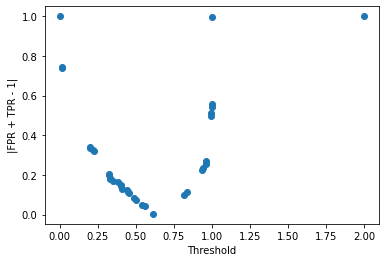

In [ ]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

As you can see, we have a minimum in range between 0.5 and 0.75. So the optimal value for our threshold is:

In [ ]:
optimal_threshold = thresholds[np.argmin(np.abs(fpr + tpr - 1))]
optimal_threshold

0.6121309461262279

This is threshold we are looking for.

### G

In [ ]:
table_from_model = result.pred_table(optimal_threshold)
sum_true = np.sum(result.pred_table(optimal_threshold),axis=0)
final_col = np.vstack((table_from_model, sum_true))
confusion_matrix_new = pd.DataFrame(
    final_col,
    columns=['Actually 0','Actually 1'],
    index=['Predicted 0','Predicted 1','sum']
)
confusion_matrix_new['sum'] = confusion_matrix['Actually 0'] + confusion_matrix['Actually 1']
confusion_matrix_new.iloc[2, 2]='_'
confusion_matrix_new

,Actually 0,Actually 1,sum
Predicted 0,264.0,34.0,298
Predicted 1,59.0,811.0,870
sum,323.0,845.0,_


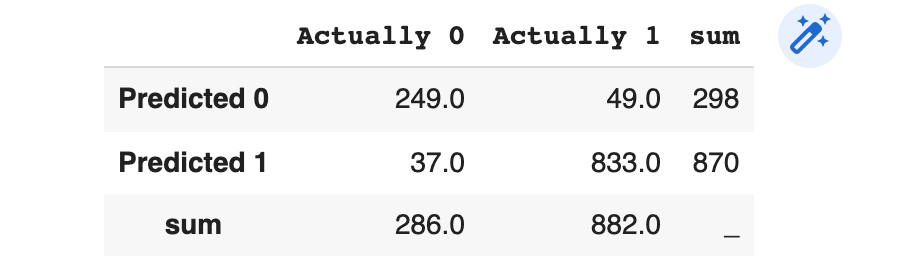

In [ ]:
print(f'Specificity is: {264/323}')
print(f'Sensitivity is: {811/845}')
print(f'Accuracy is: {(264 + 811) / (323 + 845)}')
print(f'FPR old is: {37/286}')
print(f'FPR new is: {59/323}')
print(f'TPR old is: {833/882}')
print(f'TPR new is: {811/845}')

Specificity is: 0.8173374613003096
Sensitivity is: 0.9597633136094674
Accuracy is: 0.9203767123287672
FPR old is: 0.12937062937062938
FPR new is: 0.1826625386996904
TPR old is: 0.9444444444444444
TPR new is: 0.9597633136094674


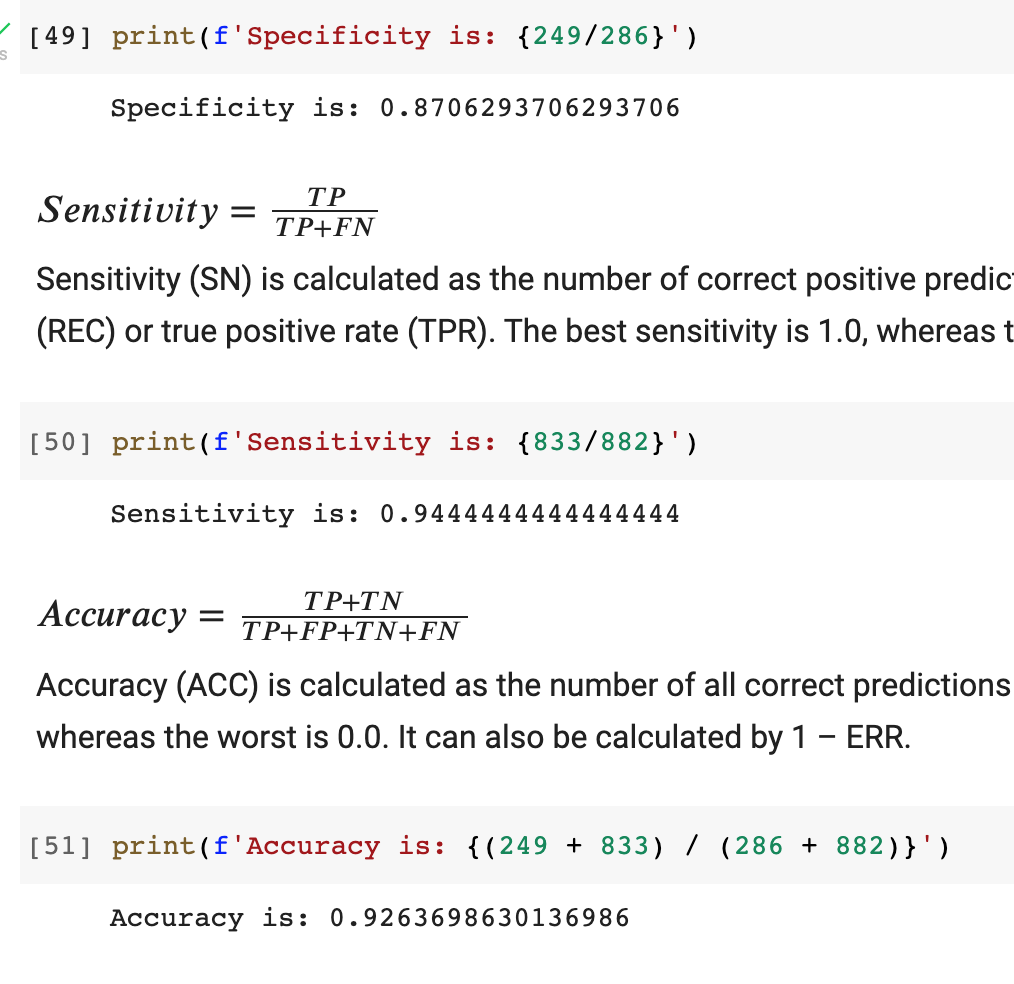

Changing a threshold from 0.5 to ~ 0.61, doesn't help a lot.

1. Yes, we have increased the Sensitivity of our model from 0.944 ~ to 0.959.
2. But on the outher hand Specificity is decreased to 0.81 from 0.87.
3. Accuracy is almsot on the same level.
4. Also with this threshold classifier will have higher FP rate and almost the same TP rate. 

To sum up changing a threshold from 0.5 to ~ 0.61 means that the model became more strict. Also, 0.61 it's a low threshold, so classifier will be more likely to classify elements as negative. As we can see now it predicts more houses with price under 130000(264 vs 249). 

About “Conservative” and “Liberal”.

From this one source I found the definitation of it.

Classifiers may be thought of as “liberal” – they make positive classifications with weak evidence, so they classify nearly all positives correctly, – but they often have high false positive rates.
Classifiers “conservative” – they make positive classifications only with strong evidence so they make few false positive errors, – but they often have low true positive rates as well.

From prevoius info we can see that we have higher FP rate with this threshold, that's why this procedure is now less “conservative”.